# Identifying PIG events suitable for satellite analysis

Criteria: 
- high magnitude (should be more noticeable in the real world)
- occurs during Summer(ish) (will be in light in the visual band image) 
- event recorded by many stations (more likely to be accurately located, hopefully within 20-50km)
- ideally, occurring in the ice tongue region


## So let's start by explicitly looking for Ice Tongue Events (Quality A)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

import obspy
from obspy.clients.fdsn import Client
from matplotlib.colors import LogNorm
from obspy import Stream
from obspy.geodetics import gps2dist_azimuth

#!pip install mp_toolkits.basemap
from mpl_toolkits.basemap import Basemap #<< works with python 3.11.5

In [3]:
# importing Son's events

son = pd.read_csv(r"C:\Users\thele\Dropbox\PC\Desktop\Honours\Pham2025_submitted\TableS1.csv")
#son = son[son['quality_group'] == 'A'] # filtering to only the quality A events

lats = son['relocated_latitude'].tolist()
lons = son['relocated_longitude'].tolist()
mags = son['Ms_BB'].tolist()
times = son['relocated_time'].tolist()
#qualities = son['quality_group'].tolist()

son_date_format = '%Y-%m-%dT%H:%M:%S.000000Z'

years = []
months = []
days = []
for i in range(len(times)):
    years.append(int(datetime.strptime(times[i], son_date_format).strftime('%Y')))
    months.append(int(datetime.strptime(times[i], son_date_format).strftime('%m')))
    days.append(int(datetime.strptime(times[i], son_date_format).strftime('%d')))

In [4]:
# Tongue region:
Ton_lats, Ton_lons, Ton_mags, Ton_times, Ton_years = [], [], [], [], []
Ton_months = []

for i in range(len(lats)):
    if lats[i] <= -74 and lats[i] >= -76 and lons[i] <= -97 and lons[i] >= -103:
        Ton_lats.append(lats[i])
        Ton_lons.append(lons[i])
        Ton_mags.append(mags[i])
        Ton_months.append(months[i])
        Ton_times.append(times[i])
        Ton_years.append(years[i] + months[i]/12 + days[i]/365)

print('Tongue events:', len(Ton_lats))

Tongue events: 67


In [5]:
# Summer is probably approximately November to March
summer_months_range = [11, 12, 1, 2, 3]

summer_lats = []
summer_lons = []
summer_mags = []
summer_times = []
summer_years = []
summer_months = []

for i in range(len(Ton_years)):
    if Ton_months[i] in summer_months_range:
        summer_lats.append(Ton_lats[i])
        summer_lons.append(Ton_lons[i])
        summer_mags.append(Ton_mags[i])
        summer_times.append(Ton_times[i])
        summer_years.append(Ton_years[i])
        summer_months.append(Ton_months[i])

print('Tongue summer events:', len(summer_lats))

Tongue summer events: 20


In [6]:
# looking at magnitude range (these all seem about reasonable tbh)
print('Tongue summer magnitudes:', min(summer_mags), 'to', max(summer_mags))

Tongue summer magnitudes: 1.94 to 2.69


In [7]:
sommer_lats, sommer_lons, sommer_mags, sommer_times, sommer_years, sommer_months = [], [], [], [], [], []

for i in range(len(summer_years)):
    if summer_mags[i] > 2.1:
        sommer_lats.append(summer_lats[i])
        sommer_lons.append(summer_lons[i])
        sommer_mags.append(summer_mags[i])
        sommer_times.append(summer_times[i])
        sommer_years.append(summer_years[i])
        sommer_months.append(summer_months[i])

summer_lats, summer_lons, summer_mags, summer_times, summer_years, summer_months = sommer_lats, sommer_lons, sommer_mags, sommer_times, sommer_years, sommer_months

In [8]:
summer_mags

[2.32,
 2.21,
 2.17,
 2.27,
 2.43,
 2.14,
 2.27,
 2.51,
 2.69,
 2.32,
 2.61,
 2.19,
 2.22,
 2.15,
 2.42,
 2.18]

In [9]:
# lets find out how many stations picked up each then

In [10]:
ap = Client('IRIS')

# we will start with just LH stations, but if this is kind of terrible talk with Son about adding more
inv_LH = ap.get_stations(network='*', station="*", level='response', channel='LHZ', starttime=obspy.UTCDateTime(2010,1,1,1),
                      endtime = obspy.UTCDateTime(2024,1,1,1), maxlatitude=-63)
print(inv_LH)

sta_lats = []
sta_lons = []
for i in range(len(inv_LH)):
    for j in range(len(inv_LH[i])):
        sta_lats.append(inv_LH[i][j].latitude)
        sta_lons.append(inv_LH[i][j].longitude)

print('Number of stations:', len(sta_lats))

Inventory created at 2025-08-26T02:11:37.672400Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2010-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (21):
			1D, 1G, 1J, 2H, 7U, 9G, ER, G, GE, IM, IU, PS, XC, XD, XH, YD, YE, 
			YT, YW, ZJ, ZM
		Stations (234):
			1D.ATOL (Atoll, Alexander Island)
			1D.BREN (Brenneke Nunatak)
			1D.ELSW (Ellsworth Land)
			1D.FOSS (Fossil Bluff)
			1D.FOWL (Fowler Peninsula ZK15)
			1D.KEAL (Kealey Ice Rise)
			1D.KIBB (Mt McKibben)
			1D.PIG1 (PIG1)
			1D.PIG2 (PIG2)
			1D.PIG3 (PIG3)
			1D.PIG4 (PIG4)
			1D.PIGD (PIGD)
			1D.ROTH (Rothera)
			1D.WELC (Welch Mountains)
			1G.HOO (HOO) (2x)
			1J.TI1A (None)
			1J.TI3A (TI3A)
			1J.TI3B (None)
			1J.TI3C (TI3C)
			1J.TI4A (TI4A)
			1J.TI6A (TI6A)
			1J.TI6B (TI6B)
			1J.TI6C (TI6C)
			1J.TI7A (TI7A)
			1J.TI8A (TI8A)
			1J.TI8B (TI8B)
			1J.TI8C (TI8C)
			2H.CONZ (Mt Erebus site Truncated Cones) (3x)

In [11]:
# indexing the stations to a single variable thats length 234 at the moment

stations_flat = []
networks_flat = []
for i in range(len(inv_LH)):
    for j in range(len(inv_LH[i])):
        stations_flat.append(inv_LH[i][j].code)
        networks_flat.append(inv_LH[i].code)

In [12]:
# calculate the distance between two stations
def distance(lat1, lon1, lat2, lon2):
    return gps2dist_azimuth(lat1, lon1, lat2, lon2)[0]

In [13]:
# sort out creation and termination dates for each station
obspy_date_format = '%Y-%m-%dT%H:%M:%S.%fZ'

station_starts = []
station_ends = []

for i in range(len(inv_LH)):
    for j in range(len(inv_LH[i])):
        
        startyear = int(datetime.strptime(str(inv_LH[i][j].start_date), obspy_date_format).strftime('%Y'))
        startmonth = int(datetime.strptime(str(inv_LH[i][j].start_date), obspy_date_format).strftime('%m'))
        startday = int(datetime.strptime(str(inv_LH[i][j].start_date), obspy_date_format).strftime('%d'))
        
        if inv_LH[i][j].end_date == None:
            endyear = 2025
            endmonth = 1
            endday = 1
        else:
            endyear = int(datetime.strptime(str(inv_LH[i][j].end_date), obspy_date_format).strftime('%Y'))
            endmonth = int(datetime.strptime(str(inv_LH[i][j].end_date), obspy_date_format).strftime('%m'))
            endday = int(datetime.strptime(str(inv_LH[i][j].end_date), obspy_date_format).strftime('%d'))
        
        station_starts.append(startyear + startmonth/12 + startday/365)
        station_ends.append(endyear + endmonth/12 + endday/365)
        
print('Station end dates length:', len(station_ends))

Station end dates length: 234


In [14]:
# lets set up traces for each distance set from the events
start_distances = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950] # in km
end_distances =   [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000] 

In [15]:
def trace_searcher_T(start_distance, end_distance):
    signals = Stream()
    arrival_times = []
    station_numbers = []
    event_numbers = []
    
    for i in range(len(sta_lats)):
        for j in range(len(summer_lats)):
            dist = distance(sta_lats[i], sta_lons[i], summer_lats[j], summer_lons[j]) / 1000 # in km
            if dist >= start_distance and dist < end_distance:
                event_time = summer_years[j]
                if event_time >= station_starts[i] and event_time <= station_ends[i]:
                    print('Tongue event:', j, 'Station:', i, 'Distance:', dist)
                    try:
                        time_to_arrive = dist / 3 # assuming a wave speed of 3 km/s
                        begin_time = obspy.UTCDateTime(summer_times[j]) + time_to_arrive - 400 # 450 second period recording around 
                        end_time = obspy.UTCDateTime(summer_times[j]) + time_to_arrive + 400 # the theoretical arrival time (3km/s speed)
                        st = ap.get_waveforms(network=networks_flat[i], station=stations_flat[i], location='*', channel='LHZ', starttime=begin_time, endtime=end_time)
                        st.remove_response(inv_LH,output='DISP',taper=True, taper_fraction=0.1)
                        st.detrend('linear')
                        st.detrend('demean')
                        st.taper(max_percentage=0.1) # original 0.1
                        signals += st
                        arrival_times.append(obspy.UTCDateTime(summer_times[j]) + time_to_arrive)
                        station_numbers.append(i) # -begin_time offset plus time to arrival
                        event_numbers.append(j)
                    except Exception as ex:
                        print(ex)
                        
    return signals, event_numbers, arrival_times, station_numbers

In [16]:
Thwaites_150_200, t_num_150_200, t_arrival_times_150_200, t_station_num_150_200 = trace_searcher_T(start_distances[0], end_distances[0])
Thwaites_200_250, t_num_200_250, t_arrival_times_200_250, t_station_num_200_250 = trace_searcher_T(start_distances[1], end_distances[1])
Thwaites_250_300, t_num_250_300, t_arrival_times_250_300, t_station_num_250_300 = trace_searcher_T(start_distances[2], end_distances[2])
Thwaites_300_350, t_num_300_350, t_arrival_times_300_350, t_station_num_300_350 = trace_searcher_T(start_distances[3], end_distances[3])
Thwaites_350_400, t_num_350_400, t_arrival_times_350_400, t_station_num_350_400 = trace_searcher_T(start_distances[4], end_distances[4])
Thwaites_400_450, t_num_400_450, t_arrival_times_400_450, t_station_num_400_450 = trace_searcher_T(start_distances[5], end_distances[5])
Thwaites_450_500, t_num_450_500, t_arrival_times_450_500, t_station_num_450_500 = trace_searcher_T(start_distances[6], end_distances[6])
Thwaites_500_550, t_num_500_550, t_arrival_times_500_550, t_station_num_500_550 = trace_searcher_T(start_distances[7], end_distances[7])
Thwaites_550_600, t_num_550_600, t_arrival_times_550_600, t_station_num_550_600 = trace_searcher_T(start_distances[8], end_distances[8])
Thwaites_600_650, t_num_600_650, t_arrival_times_600_650, t_station_num_600_650 = trace_searcher_T(start_distances[9], end_distances[9])
Thwaites_650_700, t_num_650_700, t_arrival_times_650_700, t_station_num_650_700 = trace_searcher_T(start_distances[10], end_distances[10])
Thwaites_700_750, t_num_700_750, t_arrival_times_700_750, t_station_num_700_750 = trace_searcher_T(start_distances[11], end_distances[11])
Thwaites_750_800, t_num_750_800, t_arrival_times_750_800, t_station_num_750_800 = trace_searcher_T(start_distances[12], end_distances[12])
Thwaites_800_850, t_num_800_850, t_arrival_times_800_850, t_station_num_800_850 = trace_searcher_T(start_distances[13], end_distances[13])
Thwaites_850_900, t_num_850_900, t_arrival_times_850_900, t_station_num_850_900 = trace_searcher_T(start_distances[14], end_distances[14])
Thwaites_900_950, t_num_900_950, t_arrival_times_900_950, t_station_num_900_950 = trace_searcher_T(start_distances[15], end_distances[15])
Thwaites_950_1000, t_num_950_1000, t_arrival_times_950_1000, t_station_num_950_1000 = trace_searcher_T(start_distances[16], end_distances[16])

Tongue event: 15 Station: 42 Distance: 197.07933558049132
No data available for request.
HTTP Status code: 204
Detailed response of server:


Tongue event: 15 Station: 49 Distance: 198.9436740711366
No data available for request.
HTTP Status code: 204
Detailed response of server:


Tongue event: 7 Station: 144 Distance: 191.42672505731443
No data available for request.
HTTP Status code: 204
Detailed response of server:


Tongue event: 8 Station: 144 Distance: 184.6416555108912
No data available for request.
HTTP Status code: 204
Detailed response of server:


Tongue event: 9 Station: 144 Distance: 187.62293403311227
Tongue event: 10 Station: 144 Distance: 192.70729041406136
Tongue event: 15 Station: 144 Distance: 195.87406855368832
Tongue event: 15 Station: 40 Distance: 200.2759065823048
No data available for request.
HTTP Status code: 204
Detailed response of server:


Tongue event: 15 Station: 46 Distance: 205.2601961584714
No data available for request.
HTTP Status code: 204
Detaile

In [17]:
# filtering them

def set_filterer(stream):
    stream_10_100 = stream.copy()
    stream_10_100.filter("bandpass", freqmin=0.01, freqmax=0.1, corners=3, zerophase=True)

    stream_10_20 = stream.copy()
    stream_10_20.filter("bandpass", freqmin=0.05, freqmax=0.1, corners=3, zerophase=True)

    stream_10_30 = stream.copy()
    stream_10_30.filter("bandpass", freqmin=0.03, freqmax=0.1, corners=3, zerophase=True)

    stream_10_50 = stream.copy()
    stream_10_50.filter("bandpass", freqmin=0.02, freqmax=0.1, corners=3, zerophase=True)

    stream_17_25 = stream.copy()
    stream_17_25.filter("bandpass", freqmin=0.04, freqmax=0.06, corners=3, zerophase=True)

    stream_40_70 = stream.copy()
    stream_40_70.filter("bandpass", freqmin=0.015, freqmax=0.025, corners=3, zerophase=True)

    stream_50_100 = stream.copy()
    stream_50_100.filter("bandpass", freqmin=0.01, freqmax=0.02, corners=3, zerophase=True)
    
    stream_50_150 = stream.copy()
    stream_50_150.filter("bandpass", freqmin=0.006, freqmax=0.02, corners=3, zerophase=True)

    stream_1_10 = stream.copy()
    stream_1_10.filter("bandpass", freqmin=0.1, freqmax=1.0, corners=3, zerophase=True)
    
    stream_01_10 = stream.copy()
    stream_01_10.filter("bandpass", freqmin=0.1, freqmax=10, corners=3, zerophase=True)
    
    stream_5_10 = stream.copy()
    stream_5_10.filter("bandpass", freqmin=0.1, freqmax=0.2, corners=3, zerophase=True)

    return [stream, stream_10_100, stream_10_20, stream_10_30, stream_10_50,
            stream_17_25, stream_40_70, stream_50_100, stream_50_150, stream_1_10,
            stream_01_10, stream_5_10]

In [18]:
Thwaites_150_200_filtered = set_filterer(Thwaites_150_200)
Thwaites_200_250_filtered = set_filterer(Thwaites_200_250)
Thwaites_250_300_filtered = set_filterer(Thwaites_250_300)
Thwaites_300_350_filtered = set_filterer(Thwaites_300_350)
Thwaites_350_400_filtered = set_filterer(Thwaites_350_400)
Thwaites_400_450_filtered = set_filterer(Thwaites_400_450)
Thwaites_450_500_filtered = set_filterer(Thwaites_450_500)
Thwaites_500_550_filtered = set_filterer(Thwaites_500_550)
Thwaites_550_600_filtered = set_filterer(Thwaites_550_600)
Thwaites_600_650_filtered = set_filterer(Thwaites_600_650)
Thwaites_650_700_filtered = set_filterer(Thwaites_650_700)
Thwaites_700_750_filtered = set_filterer(Thwaites_700_750)
Thwaites_750_800_filtered = set_filterer(Thwaites_750_800)
Thwaites_800_850_filtered = set_filterer(Thwaites_800_850)
Thwaites_850_900_filtered = set_filterer(Thwaites_850_900)
Thwaites_900_950_filtered = set_filterer(Thwaites_900_950)
Thwaites_950_1000_filtered = set_filterer(Thwaites_950_1000)

c:\Users\thele\anaconda3\envs\base2\Lib\site-packages\obspy\signal\filter.py:62: UserWarning: Selected high corner frequency (1.0) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)
c:\Users\thele\anaconda3\envs\base2\Lib\site-packages\obspy\signal\filter.py:62: UserWarning: Selected high corner frequency (10) of bandpass is at or above Nyquist (0.5). Applying a high-pass instead.
  warnings.warn(msg)


In [19]:
colours_bands = ['red',            'blue',           'green',       'orange',       'purple',       'cyan',         'pink',        'gray',          'olive']
#streams_bands = [PIG_sigs_unf, PIG_sigs_10_100, PIG_sigs_10_20, PIG_sigs_10_30, PIG_sigs_10_50, PIG_sigs_17_25, PIG_sigs_40_70, PIG_sigs_50_100, PIG_sigs_50_150]
names_bands =   ['unfiltered', '10-100s',        '10-20s',         '10-30s',       '10-50s',      '17-25s',        '40-70s',        '50-100s',     '50-150s', '1-10s', '0.1-10s', '5-10s']

In [20]:
from obspy.imaging.cm import obspy_sequential
import math
from matplotlib import mlab
from matplotlib.colors import Normalize

In [21]:
for i in range(len(Thwaites_150_200_filtered)):
    for j in range(len(Thwaites_150_200_filtered[i])):
        Thwaites_150_200_filtered[i][j].trim(starttime=Thwaites_150_200_filtered[i][j].stats.starttime + 200, endtime=Thwaites_150_200_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_200_250_filtered)):
    for j in range(len(Thwaites_200_250_filtered[i])):
        Thwaites_200_250_filtered[i][j].trim(starttime=Thwaites_200_250_filtered[i][j].stats.starttime + 200, endtime=Thwaites_200_250_filtered[i][j].stats.endtime - 200) 
for i in range(len(Thwaites_250_300_filtered)):
    for j in range(len(Thwaites_250_300_filtered[i])):
        Thwaites_250_300_filtered[i][j].trim(starttime=Thwaites_250_300_filtered[i][j].stats.starttime + 200, endtime=Thwaites_250_300_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_300_350_filtered)):
    for j in range(len(Thwaites_300_350_filtered[i])):
        Thwaites_300_350_filtered[i][j].trim(starttime=Thwaites_300_350_filtered[i][j].stats.starttime + 200, endtime=Thwaites_300_350_filtered[i][j].stats.endtime - 200) 
for i in range(len(Thwaites_350_400_filtered)):  
    for j in range(len(Thwaites_350_400_filtered[i])):
        Thwaites_350_400_filtered[i][j].trim(starttime=Thwaites_350_400_filtered[i][j].stats.starttime + 200, endtime=Thwaites_350_400_filtered[i][j].stats.endtime - 200) 
for i in range(len(Thwaites_400_450_filtered)):  
    for j in range(len(Thwaites_400_450_filtered[i])):
        Thwaites_400_450_filtered[i][j].trim(starttime=Thwaites_400_450_filtered[i][j].stats.starttime + 200, endtime=Thwaites_400_450_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_450_500_filtered)):
    for j in range(len(Thwaites_450_500_filtered[i])):
        Thwaites_450_500_filtered[i][j].trim(starttime=Thwaites_450_500_filtered[i][j].stats.starttime + 200, endtime=Thwaites_450_500_filtered[i][j].stats.endtime - 200) 
for i in range(len(Thwaites_500_550_filtered)):  
    for j in range(len(Thwaites_500_550_filtered[i])):
        Thwaites_500_550_filtered[i][j].trim(starttime=Thwaites_500_550_filtered[i][j].stats.starttime + 200, endtime=Thwaites_500_550_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_550_600_filtered)):
    for j in range(len(Thwaites_550_600_filtered[i])):
        Thwaites_550_600_filtered[i][j].trim(starttime=Thwaites_550_600_filtered[i][j].stats.starttime + 200, endtime=Thwaites_550_600_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_600_650_filtered)):
    for j in range(len(Thwaites_600_650_filtered[i])):
        Thwaites_600_650_filtered[i][j].trim(starttime=Thwaites_600_650_filtered[i][j].stats.starttime + 200, endtime=Thwaites_600_650_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_650_700_filtered)):  
    for j in range(len(Thwaites_650_700_filtered[i])):
        Thwaites_650_700_filtered[i][j].trim(starttime=Thwaites_650_700_filtered[i][j].stats.starttime + 200, endtime=Thwaites_650_700_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_700_750_filtered)):
    for j in range(len(Thwaites_700_750_filtered[i])):
        Thwaites_700_750_filtered[i][j].trim(starttime=Thwaites_700_750_filtered[i][j].stats.starttime + 200, endtime=Thwaites_700_750_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_750_800_filtered)):
    for j in range(len(Thwaites_750_800_filtered[i])):
        Thwaites_750_800_filtered[i][j].trim(starttime=Thwaites_750_800_filtered[i][j].stats.starttime + 200, endtime=Thwaites_750_800_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_800_850_filtered)):
    for j in range(len(Thwaites_800_850_filtered[i])):
        Thwaites_800_850_filtered[i][j].trim(starttime=Thwaites_800_850_filtered[i][j].stats.starttime + 200, endtime=Thwaites_800_850_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_850_900_filtered)):
    for j in range(len(Thwaites_850_900_filtered[i])):
        Thwaites_850_900_filtered[i][j].trim(starttime=Thwaites_850_900_filtered[i][j].stats.starttime + 200, endtime=Thwaites_850_900_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_900_950_filtered)):
    for j in range(len(Thwaites_900_950_filtered[i])):
        Thwaites_900_950_filtered[i][j].trim(starttime=Thwaites_900_950_filtered[i][j].stats.starttime + 200, endtime=Thwaites_900_950_filtered[i][j].stats.endtime - 200)
for i in range(len(Thwaites_950_1000_filtered)):
    for j in range(len(Thwaites_950_1000_filtered[i])):
        Thwaites_950_1000_filtered[i][j].trim(starttime=Thwaites_950_1000_filtered[i][j].stats.starttime + 200, endtime=Thwaites_950_1000_filtered[i][j].stats.endtime - 200)

In [22]:
t_distance_streams_filtered = [Thwaites_150_200_filtered, Thwaites_200_250_filtered, Thwaites_250_300_filtered, Thwaites_300_350_filtered,
                             Thwaites_350_400_filtered, Thwaites_400_450_filtered, Thwaites_450_500_filtered, Thwaites_500_550_filtered,
                             Thwaites_550_600_filtered, Thwaites_600_650_filtered, Thwaites_650_700_filtered, Thwaites_700_750_filtered,
                             Thwaites_750_800_filtered, Thwaites_800_850_filtered, Thwaites_850_900_filtered, Thwaites_900_950_filtered,
                             Thwaites_950_1000_filtered]

In [23]:
t_event_numbers_streams = [t_num_150_200, t_num_200_250, t_num_250_300, t_num_300_350, t_num_350_400, t_num_400_450, t_num_450_500,
                        t_num_500_550, t_num_550_600, t_num_600_650, t_num_650_700, t_num_700_750, t_num_750_800,
                        t_num_800_850, t_num_850_900, t_num_900_950, t_num_950_1000]

t_arrival_times_streams = [t_arrival_times_150_200, t_arrival_times_200_250, t_arrival_times_250_300, t_arrival_times_300_350,
                        t_arrival_times_350_400, t_arrival_times_400_450, t_arrival_times_450_500, t_arrival_times_500_550,
                        t_arrival_times_550_600, t_arrival_times_600_650, t_arrival_times_650_700, t_arrival_times_700_750,
                        t_arrival_times_750_800, t_arrival_times_800_850, t_arrival_times_850_900, t_arrival_times_900_950,
                        t_arrival_times_950_1000]

t_station_numbers_streams = [t_station_num_150_200, t_station_num_200_250, t_station_num_250_300, t_station_num_300_350,
                          t_station_num_350_400, t_station_num_400_450, t_station_num_450_500, t_station_num_500_550,
                          t_station_num_550_600, t_station_num_600_650, t_station_num_650_700, t_station_num_700_750,
                          t_station_num_750_800, t_station_num_800_850, t_station_num_850_900, t_station_num_900_950,
                          t_station_num_950_1000]

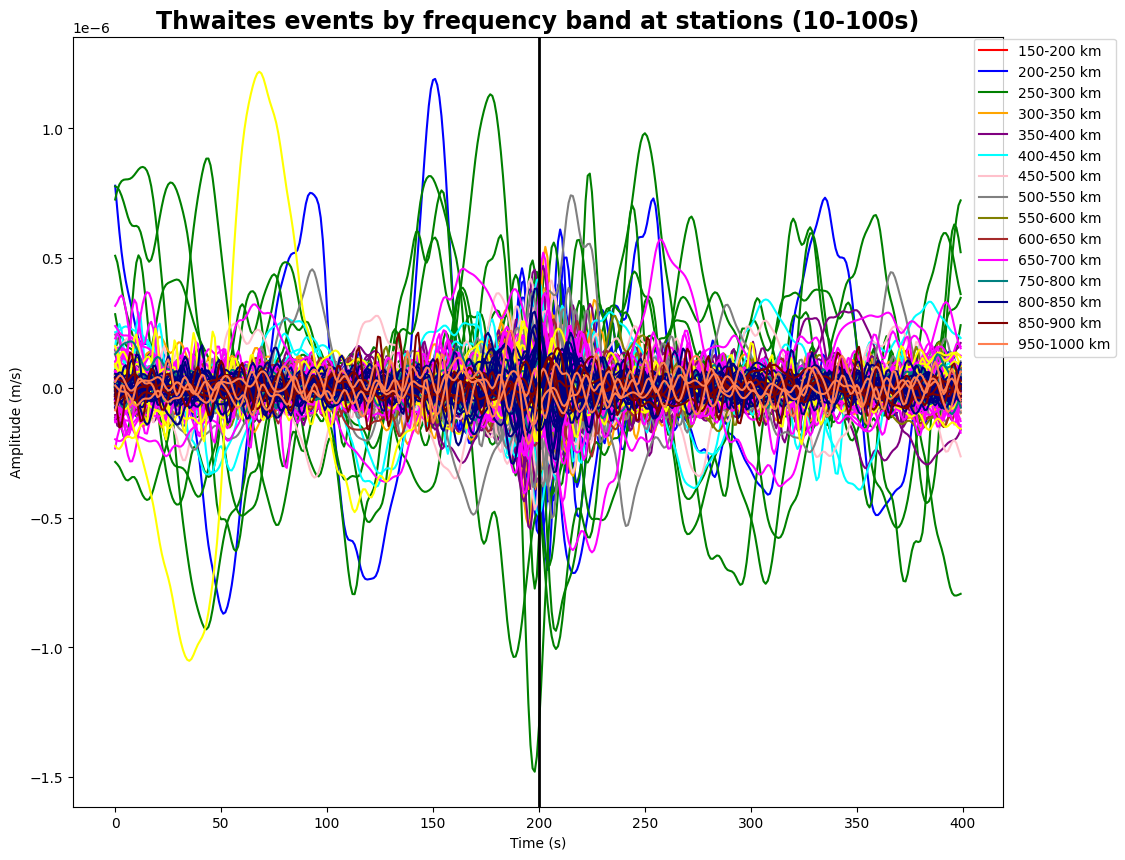

In [24]:
t_sets_10_100 = [Thwaites_150_200_filtered[1], Thwaites_200_250_filtered[1], Thwaites_250_300_filtered[1], Thwaites_300_350_filtered[1], Thwaites_350_400_filtered[1], Thwaites_400_450_filtered[1],
               Thwaites_450_500_filtered[1], Thwaites_500_550_filtered[1], Thwaites_550_600_filtered[1], Thwaites_600_650_filtered[1], Thwaites_650_700_filtered[1], Thwaites_700_750_filtered[1],
               Thwaites_750_800_filtered[1], Thwaites_800_850_filtered[1], Thwaites_850_900_filtered[1], Thwaites_900_950_filtered[1], Thwaites_950_1000_filtered[1]]

colours_10_100 = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'pink', 'gray', 'olive', 'brown', 'magenta', 'yellow', 'teal', 'navy', 'maroon', 'lime', 'coral']
distance_bands = ['150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '550-600', '600-650', '650-700', '700-750', '750-800', '800-850', '850-900', '900-950', '950-1000']

# plotting all the 10-100s waveforms together, colour-coded by distance band

fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(1, 1, 1)
for i in range(len(t_sets_10_100)):
    for j in range(len(t_sets_10_100[i])):
        if max(abs(t_sets_10_100[i][j].data)) <0.000009 and max(abs(t_sets_10_100[i][j].data)) > 0.0000001: #< 0.000001:
            if j == 0:
                ax.plot(t_sets_10_100[i][j].times(), t_sets_10_100[i][j].data, label=f'{distance_bands[i]} km', color=colours_10_100[i]) # plotting each event in the frequency band
            else:
                ax.plot(t_sets_10_100[i][j].times(), t_sets_10_100[i][j].data, color=colours_10_100[i]) # plotting each event in the frequency band

ax.axvline(200, 0, 1, color='k', linewidth=2) # vertical line at the approximate arrival time (same for all, relatively)
ax.set_title('Thwaites events by frequency band at stations (10-100s)', fontsize=17, fontweight='bold')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (m/s)')

# Place a single legend for the whole figure
fig.legend(loc='upper right', bbox_to_anchor=(1, 0.885), frameon=True)
plt.show()

In [25]:
t_sets_10_100_quality = []
t_arrivals_10_100_quality = []
t_events_10_100_quality = []
t_stations_10_100_quality = []

minval, maxval = 0.0000001, 0.000009

for i in range(len(t_sets_10_100)):
    setse = []
    arrive = []
    evente = []
    statione = []
    for j in range(len(t_sets_10_100[i])):
        if minval <= max(abs(t_sets_10_100[i][j].data)) <= maxval:
            setse.append(t_sets_10_100[i][j])
            arrive.append(t_arrival_times_streams[i][j])
            evente.append(t_event_numbers_streams[i][j])
            statione.append(t_station_numbers_streams[i][j])
    t_sets_10_100_quality.append(setse)
    t_arrivals_10_100_quality.append(arrive)
    t_events_10_100_quality.append(evente)
    t_stations_10_100_quality.append(statione)
            
len(t_sets_10_100_quality[0])


3

In [26]:
def avg_mean_spectrogram_t(traces):
    fs = 1.0 # sampling rate in Hz
    nfft = 128  # number of points in FFT
    pad_to = 1024  # padding to next power of 2
    noverlap = 115 # number of points to overlap between segments
    vmin, vmax = 0.0, 1.0  # color scale limits
    # extracting the data
    datas = []
    for trace in traces:
        if len(trace.data) > 300: # somewhat arbitrary - we expect 400 and can't use 128 or below lengths
            datas.append(trace.data)
    # doing the spectrogram calculation
    
    if len(datas) == 0:
        return None  # no data to process
    else:
        specs, freqs, times = [], [], []
        for data in datas:
            spec, freq, time = mlab.specgram(data, Fs=fs, NFFT=nfft, pad_to=pad_to, noverlap=noverlap)
            spec = np.sqrt(spec[1:, :])
            freq = freq[1:]
            halfbin_time = (time[1] - time[0]) / 2.0
            halfbin_freq = (freq[1] - freq[0]) / 2.0
            freq = np.concatenate((freq, [freq[-1] + 2 * halfbin_freq]))
            time = np.concatenate((time, [time[-1] + 2 * halfbin_time]))
            time -= halfbin_time
            freq -= halfbin_freq
            specs.append(spec)
            freqs.append(freq)
            times.append(time)
        # making them all of equal size
        min_time_bins = (min(specs[i].shape[1] for i in range(len(specs))))
        min_freq_bins = (min(specs[i].shape[0] for i in range(len(specs))))
        for i in range(len(specs)):
            specs[i] = specs[i][:min_freq_bins, :min_time_bins]
            vmin = specs[i].min() + vmin * float(specs[i].max() - specs[i].min())
            vmax = specs[i].min() + vmax * float(specs[i].max() - specs[i].min())
            specs[i] = (specs[i] - specs[i].min()) / (specs[i].max() - specs[i].min())  # normalising each spectrogram
            
        # averaging the spectrograms
        avg_spec = np.mean(specs, axis=0)
        # normalising the spectrogram
        #vmin = avg_spec.min() + vmin * float(avg_spec.max() - avg_spec.min())
        #vmax = avg_spec.min() + vmax * float(avg_spec.max() - avg_spec.min())
        #norm = Normalize(vmin, vmax, clip=True)
        # # plotting the spectrogram
        # fig = plt.figure()
        # ax = fig.add_subplot(111)
        # ax.set_yscale('log')  # Set y-axis to log scale
        # ax.pcolormesh(times[0][:min_time_bins], freqs[0][:min_freq_bins], avg_spec, norm=norm, shading='gouraud')
        # plt.ylabel('Frequency [Hz]')
        # plt.xlabel('Time [sec]')
        #return plt.show()
        return times[0][:min_time_bins], freqs[0][:min_freq_bins], avg_spec

In [27]:
len(summer_mags)

16

In [28]:
num_events = 16
t_events = [[] for _ in range(num_events)]
t_stations = [[] for _ in range(num_events)]

for i in range(len(t_sets_10_100)):
    for j in range(len(t_sets_10_100[i])):
        event_num = t_event_numbers_streams[i][j]
        if 0 <= event_num < num_events:
            t_events[event_num].append(t_sets_10_100[i][j])
            t_stations[event_num].append(t_station_numbers_streams[i][j])
            
t_events

t_events_quality = [[] for _ in range(num_events)]
t_stations_quality = [[] for _ in range(num_events)]

for i in range(len(t_sets_10_100_quality)):
    for j in range(len(t_sets_10_100_quality[i])):
        event_num = t_events_10_100_quality[i][j]
        if 0 <= event_num < num_events:
            t_events_quality[event_num].append(t_sets_10_100_quality[i][j])
            t_stations_quality[event_num].append(t_stations_10_100_quality[i][j])

In [29]:
len(t_events_quality)

16

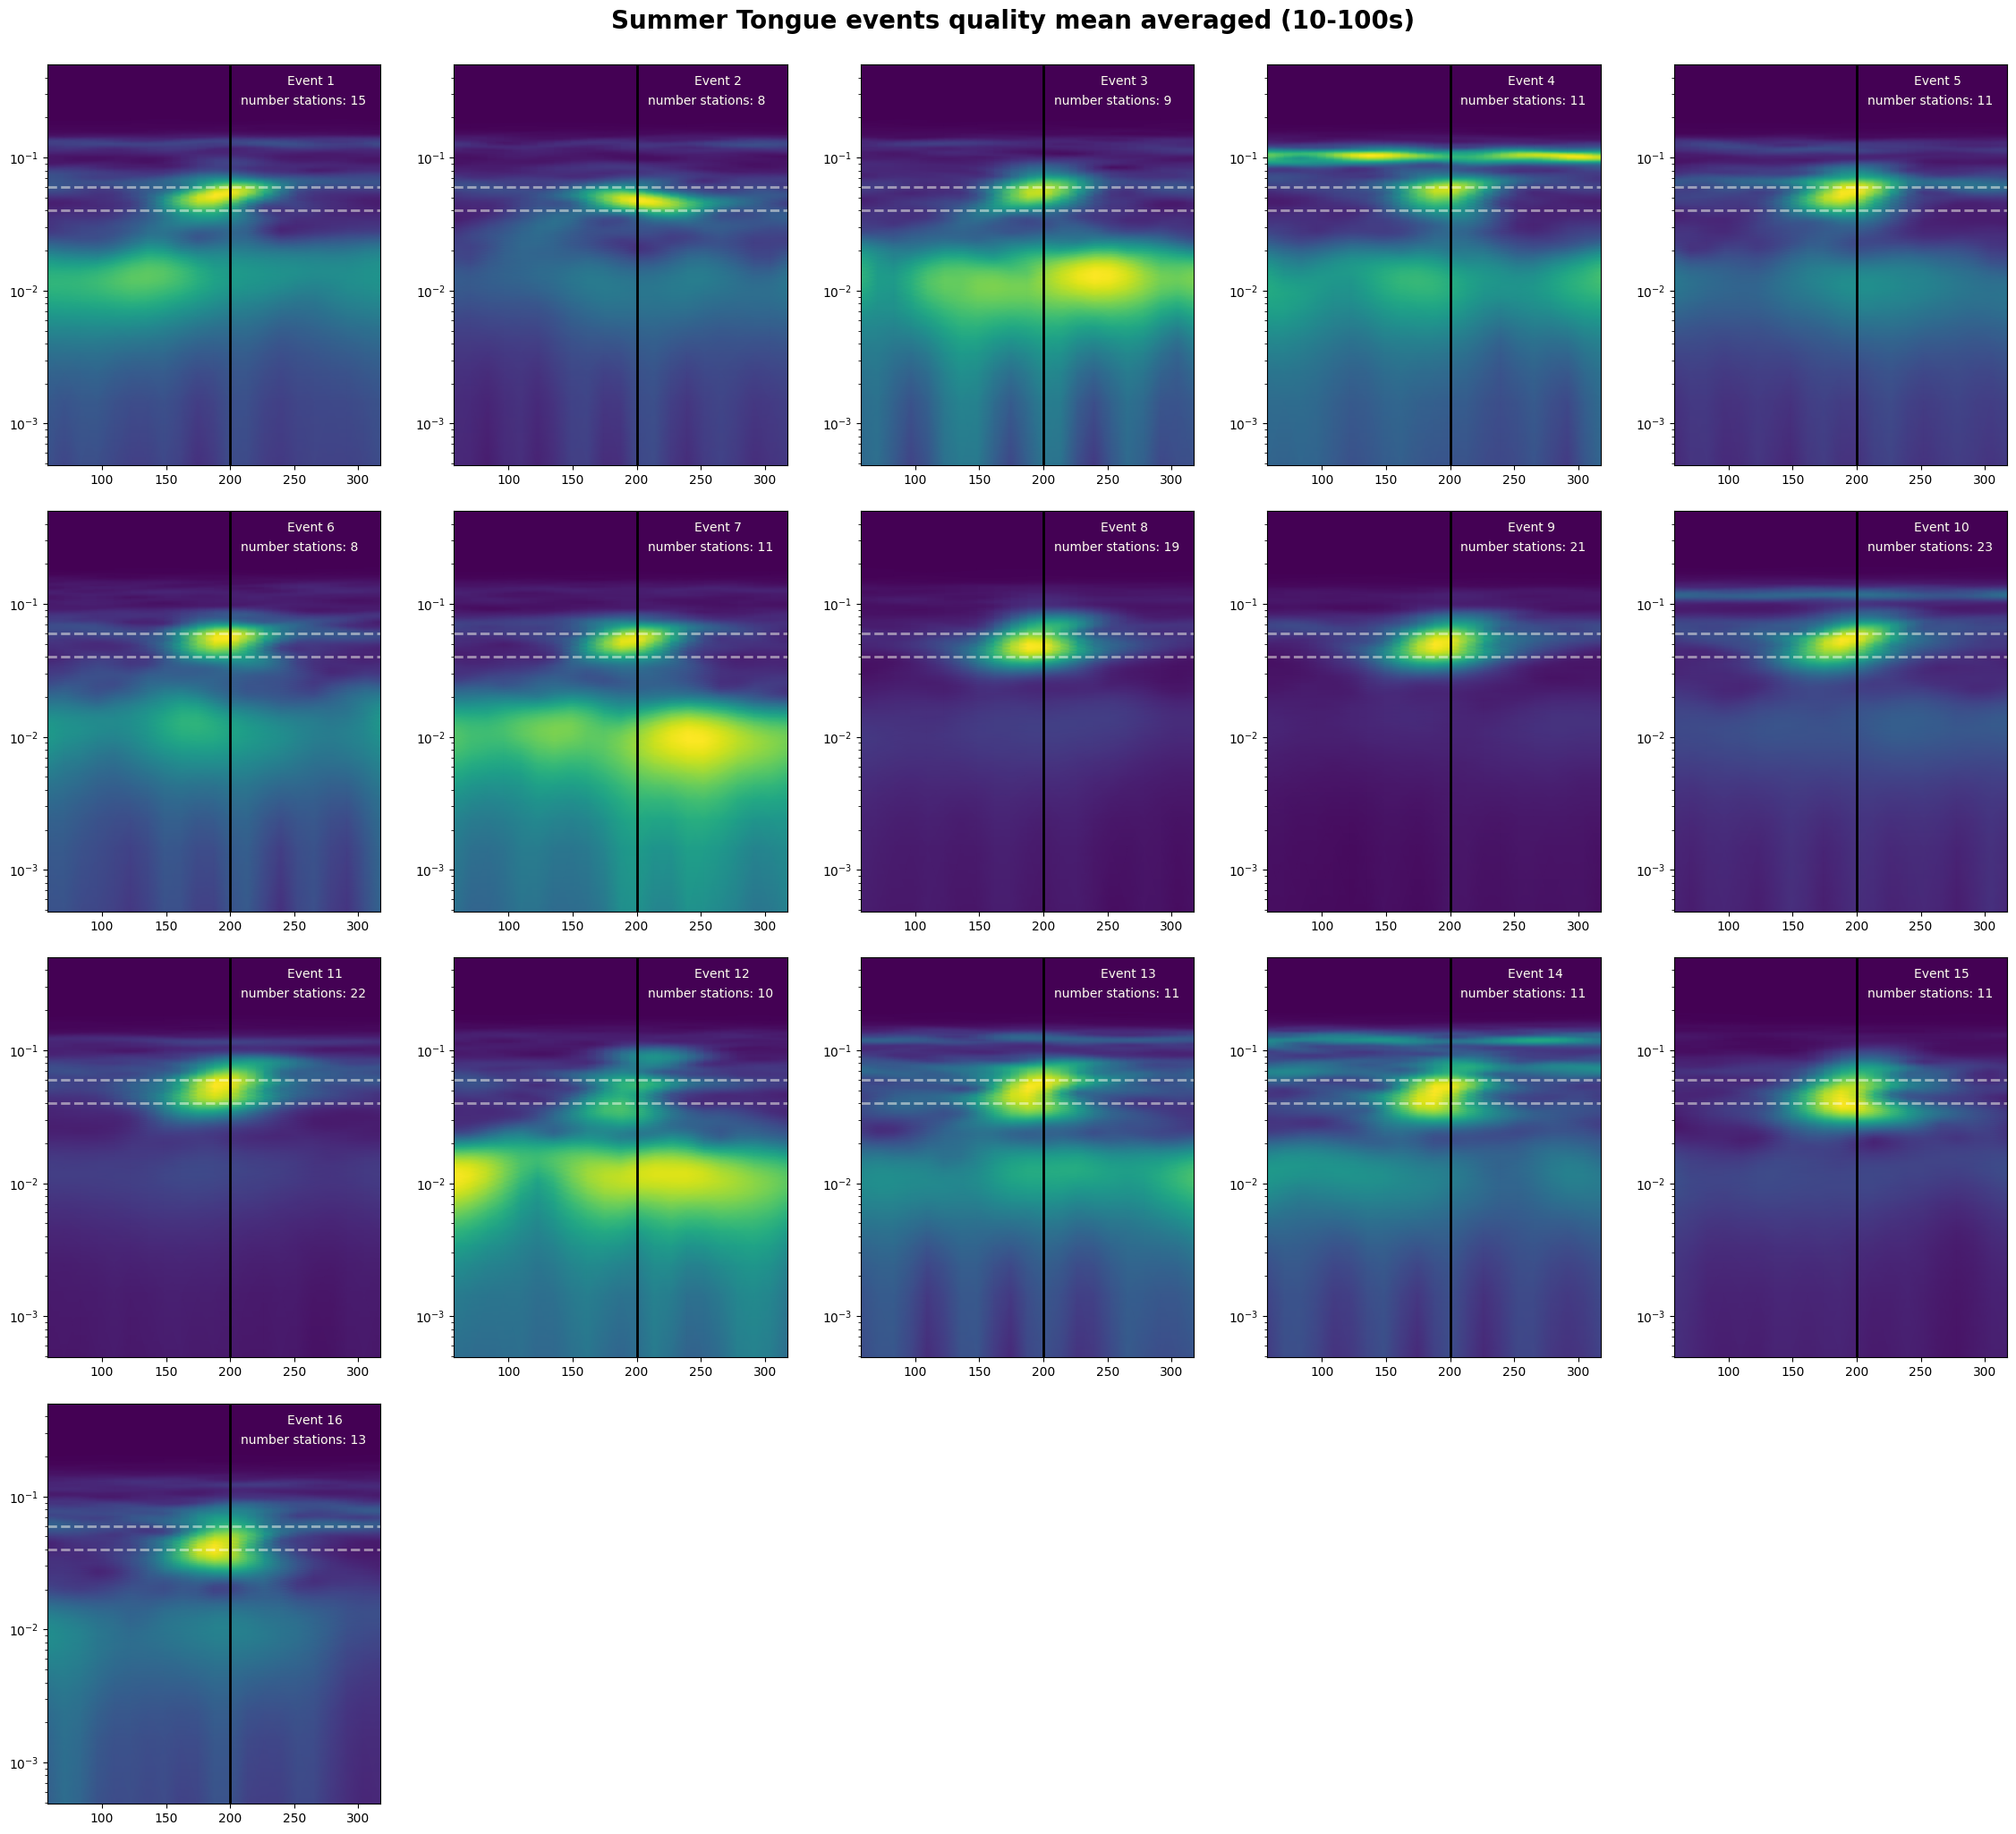

In [30]:
fig = plt.figure(figsize=(23, 21))
axes = []
for i in range(len(t_events_quality)):
    ax = plt.subplot(4, 5, i+1)
    axes.append(ax)
    ax.set_yscale('log')
    
    spec_data = avg_mean_spectrogram_t(t_events_quality[i])
    if spec_data is None:
        continue
    else:
        x, y, data = spec_data
        ax.pcolormesh(x, y, data, shading='gouraud')
        ax.text(0.72, 0.95, f'Event {i+1}', fontsize=10, c='ivory', transform=ax.transAxes)
        ax.text(0.58, 0.90, f'number stations: {len(t_events_quality[i])}', fontsize=10, c='ivory', transform=ax.transAxes)
        plt.axvline(200, 0, 1, color='k', linewidth=2) # vertical line at the approximate arrival time
        plt.axhline(0.04, 0, 1, color='ivory', alpha=0.5, ls='--', linewidth=2)
        plt.axhline(0.06, 0, 1, color='ivory', alpha=0.5, ls='--', linewidth=2)

plt.suptitle('Summer Tongue events quality mean averaged (10-100s)', fontsize=20, fontweight='bold')
plt.tight_layout(pad=2, rect=[0, 0, 1, 0.99])
plt.show()

In [31]:
## most eligible events

good_options = [4, 7, 8, 9, 10, 12, 13, 14, 15]

In [32]:
# checking the months of the good options << most ideal is 12, 1, 2

for i in range(len(summer_months)):
    if i in good_options:
        print(f'Event {i+1} month: {summer_months[i]}')

Event 5 month: 11
Event 8 month: 12
Event 9 month: 1
Event 10 month: 1
Event 11 month: 1
Event 13 month: 11
Event 14 month: 11
Event 15 month: 11
Event 16 month: 3


In [ ]:
# this means my first target events are
best_options = [7, 8, 9, 10] # 7 and 8 we have imagery for, 9 and 10 we do not

best_options = [6, 12, 13, 14, 15] # events 13 onwards we have sentinel 2 imagery for as well - just to note
# we have imagery for 6, 12, 13, and 14 - but not 15 landsat seems to stop by then, and sentinel doesn't have good timing available


In [34]:
# coordinates and times of the best options

for i in range(len(summer_times)):
    if i in best_options:
        print(f'Event {i+1} time: {summer_times[i]}')
        print(f'Event {i+1} lat: {summer_lats[i]}, lon: {summer_lons[i]}\n')

Event 7 time: 2013-11-23T04:22:04.000000Z
Event 7 lat: -74.97, lon: -99.46

Event 13 time: 2018-11-22T12:37:38.000000Z
Event 13 lat: -75.39, lon: -101.75

Event 14 time: 2018-11-23T18:59:17.000000Z
Event 14 lat: -75.36, lon: -101.82

Event 15 time: 2018-11-29T07:20:55.000000Z
Event 15 lat: -75.37, lon: -101.73

Event 16 time: 2020-03-19T11:55:25.000000Z
Event 16 lat: -75.51, lon: -101.66



In [35]:
best_options = [7, 8, 9, 10] # 7 and 8 we have imagery for, 9 and 10 we do not
for i in range(len(summer_times)):
    if i in best_options:
        print(f'Event {i+1} time: {summer_times[i]}')
        print(f'Event {i+1} lat: {summer_lats[i]}, lon: {summer_lons[i]}\n')

Event 8 time: 2015-12-28T05:46:14.000000Z
Event 8 lat: -75.44, lon: -102.07

Event 9 time: 2016-01-03T04:57:45.000000Z
Event 9 lat: -75.45, lon: -102.35

Event 10 time: 2016-01-10T19:23:27.000000Z
Event 10 lat: -75.46, lon: -102.18

Event 11 time: 2016-01-17T02:01:56.000000Z
Event 11 lat: -75.45, lon: -101.98

